In [23]:
import numpy as np
from scipy.integrate import odeint

# Define the differential equations
def model(y, x, q):
    V, M = y
    dVdx = -q
    dMdx = V
    return [dVdx, dMdx]

# Set the initial conditions
y0 = [0, 0]

# Set the value of q and define the range of x values
q = -1
x = np.linspace(0, 1, 11)

# Solve the differential equations
sol = odeint(model, y0, x, args=(q,))

# Extract the solutions for V and M
V = sol[:, 0]
M = sol[:, 1]

# Calculate V and M at x=0.4
x_idx = np.argmin(np.abs(x - 0.4))
V_04 = V[x_idx]
M_04 = M[x_idx]

# Print the results
print(f"V at x=0.4: {V_04:.2f}")
print(f"M at x=0.4: {M_04:.2f}")

V at x=0.4: 0.40
M at x=0.4: 0.08


V[0] = -0.5 ; M[0] = 0
1 -0.45
2 -0.405
3 -0.36450000000000005
4 -0.32805000000000006
5 -0.29524500000000004
6 -0.2657205
7 -0.23914845
8 -0.215233605
9 -0.1937102445


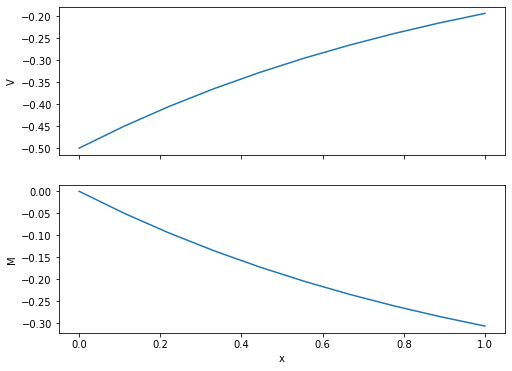

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# define the differential equations
def dV_dx(q):
    return -q

def dM_dx(V):
    return V

# define the initial conditions
V0 = -0.5 #c1
M0 = 0.0

# define the range of x values to solve for
x_start = 0.0
x_stop = 1.0
num_points = 10
x_range = np.linspace(x_start, x_stop, num_points)

# define the step size for the numerical integration
dx = (x_stop - x_start) / num_points

# initialize arrays to store the solutions
V = np.zeros(num_points)
M = np.zeros(num_points)

# set the initial values of V and M
V[0] = V0
M[0] = M0
print ("V[0] = %s ; M[0] = %d" % (V0, M0) )

# use numerical integration to solve the differential equations
for i in range(1, num_points):
    V[i] = V[i-1] + dV_dx(V[i-1]) * dx
    print (i, V[i])
    M[i] = M[i-1] + dM_dx(V[i-1]) * dx

# plot the solutions
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
ax[0].plot(x_range, V, label='V')
ax[1].plot(x_range, M, label='M')
ax[0].set_ylabel('V')
ax[1].set_ylabel('M')
ax[1].set_xlabel('x')
plt.show()

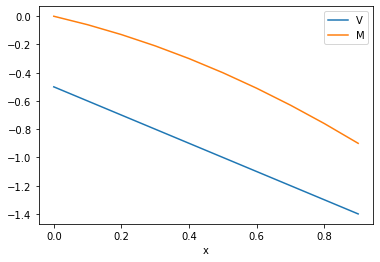

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and initial conditions
q = 1.0
x0 = 0.0
V0 = -0.5
M0 = 0.0
dx = 0.1
n = 10

# Define arrays to store the results
x = np.zeros(n)
V = np.zeros(n)
M = np.zeros(n)

# Set initial conditions
x[0] = x0
V[0] = V0
M[0] = M0

# Implement Euler method
for i in range(1, n):
    V[i] = V[i-1] - q*dx
    M[i] = M[i-1] + V[i]*dx
    x[i] = x[i-1] + dx

# Plot results
plt.plot(x, V, label='V')
plt.plot(x, M, label='M')
plt.legend()
plt.xlabel('x')
plt.show()

We are given the following system of differential equations:

dV/dx = -q

dM/dx = V

To solve this system, we can start by integrating the first equation with respect to x:

∫ dV/dx dx = -∫ q dx

V = -qx + C1

where C1 is a constant of integration.

Next, we can substitute this expression for V into the second equation:

dM/dx = V

dM/dx = -qx + C1

Integrating both sides with respect to x, we get:

∫ dM/dx dx = ∫ (-qx + C1) dx

M = -0.5qx^2 + C1x + C2

where C2 is another constant of integration.

Therefore, the solution to the system of differential equations is:

V = -qx + C1

M = -0.5qx^2 + C1x + C2

where C1 and C2 are constants of integration that can be determined from any initial conditions given for the problem.

# 2
M(x=0) = 0

M(x=1) = 0

Using these conditions, we can solve for C1 and C2:

From the equation for M, we have:

M = -0.5qx^2 + C1x + C2

Substituting x=0 and M=0, we get:

0 = -0.5q(0)^2 + C1(0) + C2

C2 = 0

Substituting x=1 and M=0, we get:

0 = -0.5q(1)^2 + C1(1) + C2

0 = -0.5q + C1

C1 = 0.5q

Therefore, the solution to the system of differential equations with the given initial conditions is:

V = -qx + 0.5q

M = -0.5qx^2 + 0.5qx

where q is a constant.

In [25]:
import numpy as np
from scipy.integrate import odeint

def system(y, x, q):
    V, M = y
    dVdx = -q
    dMdx = V
    return [dVdx, dMdx]

q = 1.0

#M(x=0) = 0;  M(x=1) = 0
# Initial conditions
V0 = 0.5*q
M0 = 0.0
y0 = [V0, M0]

# Integration points
x_points = np.linspace(0, 1, 11)

# Solve the system of differential equations using scipy.integrate.odeint
sol = odeint(system, y0, x_points, args=(q,))

# Extract the solutions for V and M
V = sol[:, 0]
M = sol[:, 1]

print("V(x) = ", V)
print("M(x) = ", M)

V(x) =  [ 0.5  0.4  0.3  0.2  0.1  0.  -0.1 -0.2 -0.3 -0.4 -0.5]
M(x) =  [ 0.00000000e+00  4.49999999e-02  7.99999999e-02  1.05000000e-01
  1.20000000e-01  1.25000000e-01  1.20000000e-01  1.05000000e-01
  7.99999999e-02  4.49999999e-02 -1.48352830e-10]


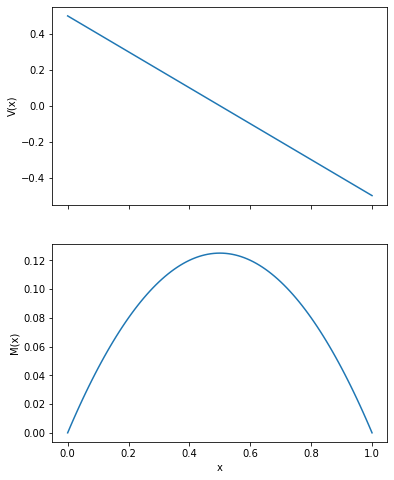

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

q = 1.0

# Define the system of differential equations
def system(y, x):
    V, M = y
    dVdx = -q
    dMdx = V
    return [dVdx, dMdx]

# Define the initial conditions
V0 = 0.5*q
M0 = 0.0
y0 = [V0, M0]

# Generate a list of x values to evaluate the solutions at
x_values = np.linspace(0, 1, 101)

# Solve the system of differential equations numerically
sol = odeint(system, y0, x_values)

# Extract the solutions for V and M from the solution array
V_values = sol[:, 0]
M_values = sol[:, 1]

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,8))
ax1.plot(x_values, V_values)
ax1.set_ylabel("V(x)")
ax2.plot(x_values, M_values)
ax2.set_ylabel("M(x)")
ax2.set_xlabel("x")
plt.show()

[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01  5.55111512e-17  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01]
[ 0.00000000e+00 -4.49999999e-02 -7.99999999e-02 -1.05000000e-01
 -1.20000000e-01 -1.25000000e-01 -1.20000000e-01 -1.05000000e-01
 -7.99999999e-02 -4.49999999e-02  1.47470978e-10]


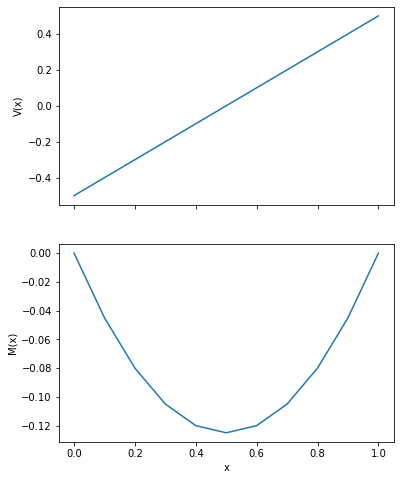

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

q = -1.0
M_end = 0.0  # value of M at x=1

def system(y, x):
    V, M = y
    dVdx = -q
    dMdx = V if x < 1 else (M - M_end)/(x - 1)  # if x < 1, use dM/dx = V; if x = 1, use M_end as parameter
    return [dVdx, dMdx]

def solve_system(M_start):
    y0 = [0.5*q, M_start]  # initial values of V and M at x=0
    x_values = np.linspace(0, 1, 11)
    sol = odeint(system, y0, x_values)
    V_values = sol[:, 0]
    M_values = sol[:, 1]
    print (V_values)
    print (M_values)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,8))
    ax1.plot(x_values, V_values)
    ax1.set_ylabel("V(x)")
    ax2.plot(x_values, M_values)
    ax2.set_ylabel("M(x)")
    ax2.set_xlabel("x")
    plt.show()

# Example usage:
M_start = 0.0  # value of M at x=0
solve_system(M_start)

In [49]:
import numpy as np
from scipy.integrate import solve_ivp

def dVdx(x, y):
    q = 1
    return [-q, y[0]]

def get_MV_at_x(x_value, M_start):
    sol = solve_ivp(dVdx, [0, 1], [0.5, M_start], dense_output=True)
    x_range = np.linspace(0, 1, num=10)
    y_range = sol.sol(x_range)
    M_at_x = y_range[1, np.argmin(np.abs(x_range - x_value))]
    V_at_x = y_range[0, np.argmin(np.abs(x_range - x_value))]
    return M_at_x, V_at_x

# Example usage:
M, V = get_MV_at_x(0.5, 0.1)
print(f"At x=0.5, M={M:.3f} and V={V:.3f}")

At x=0.5, M=0.223 and V=0.056


In [52]:
import numpy as np
from scipy.integrate import odeint

def system(y, x, q):
    V, M = y
    dVdx = -q
    dMdx = V
    return [dVdx, dMdx]

q = -1.0

#M(x=0) = 0;  M(x=1) = 0
# Initial conditions
V0 = 0.5*q
M0 = 0.0
y0 = [V0, M0]

# Integration points
x_points = np.linspace(0, 1, 11)

# Solve the system of differential equations using scipy.integrate.odeint
sol = odeint(system, y0, x_points, args=(q,))

# Extract the solutions for V and M
V = sol[:, 0]
M = sol[:, 1]

print("V(x) = ", V)
print("M(x) = ", M)

V(x) =  [-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]
M(x) =  [ 0.00000000e+00 -4.49999999e-02 -7.99999999e-02 -1.05000000e-01
 -1.20000000e-01 -1.25000000e-01 -1.20000000e-01 -1.05000000e-01
 -7.99999999e-02 -4.49999999e-02  1.48352830e-10]


In [53]:
import numpy as np

def compute_M_V(x, q):
    """
    Computes M and V at a specific x value.

    Args:
        x: The value of x at which to compute M and V.
        q: The value of the constant q.

    Returns:
        A tuple (M, V) containing the computed values of M and V.
    """
    V = 0
    M = -q/8 * x**2 + q/8
    return M, V

# Example usage:
x = 0.5
q = 1.0
M, V = compute_M_V(x, q)
print(f"At x={x}, M={M} and V={V}")

At x=0.5, M=0.09375 and V=0


dV/dx = -q = 1 (as q(x) = -1)

dM/dx = V

∫ dV/dx dx = ∫ -q dx

V = -x + C1 (where C1 is the constant of integration)

dM/dx = -x + C1

∫ dM = ∫ (-x + C1) dx

M = -x^2/2 + C1x + C2 (where C2 is the constant of integration)


### DE solution
V = -x + C1

M = -x^2/2 + C1x + C2

where C1 and C2 are initial conditions constants

let M(x=0)=0 and M(x=1)=0

M(x=0) = 0 => C2 = 0

M(x=1) = 0 => -1/2 + C1 + C2 = 0 => C1 = 0.5

V(x) = -x + 1/2

M(x) = -x^2/2 + 1/2*x


In [26]:
for x in range(0,10,1):
    x=x/10.0
    V = -x + 1/2
    M = -x**2/2 + 1/2*x
    
    print("V=%s and M=%s at x = %s" % (V,M,x))


V=0.5 and M=0.0 at x = 0.0
V=0.4 and M=0.045 at x = 0.1
V=0.3 and M=0.08 at x = 0.2
V=0.2 and M=0.105 at x = 0.3
V=0.09999999999999998 and M=0.12 at x = 0.4
V=0.0 and M=0.125 at x = 0.5
V=-0.09999999999999998 and M=0.12 at x = 0.6
V=-0.19999999999999996 and M=0.10500000000000001 at x = 0.7
V=-0.30000000000000004 and M=0.07999999999999996 at x = 0.8
V=-0.4 and M=0.044999999999999984 at x = 0.9


V(0.0) = 0.0
M(0.0) = 0.0

V(0.1) = 0.1
M(0.1) = 0.005000000147536633

V(0.2) = 0.2
M(0.2) = 0.020000000147536633

V(0.30000000000000004) = 0.30000000000000004
M(0.30000000000000004) = 0.045000000147536634

V(0.4) = 0.40000000000000013
M(0.4) = 0.08000000014753672

V(0.5) = 0.5
M(0.5) = 0.12500000014753665

V(0.6000000000000001) = 0.6000000000000001
M(0.6000000000000001) = 0.1800000001475368

V(0.7000000000000001) = 0.7000000000000001
M(0.7000000000000001) = 0.24500000014753676

V(0.8) = 0.8
M(0.8) = 0.3200000001475367

V(0.9) = 0.9
M(0.9) = 0.40500000014753657

V(1.0) = 1.0
M(1.0) = 0.5000000001475366



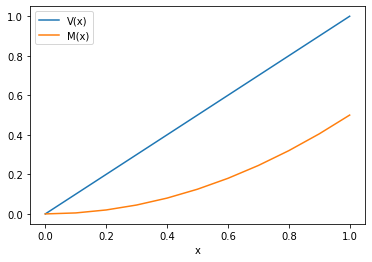

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equations
def eqns(y, x):
    V, M = y
    q = -1
    dVdx = -q
    dMdx = V
    return [dVdx, dMdx]

# Define the initial conditions
y0 = [0, 0]

# Define the range of x values to solve for
x = np.linspace(0, 1, 11)

# Solve the differential equations
sol = odeint(eqns, y0, x)

# Extract the solutions for V(x) and M(x)
V = sol[:, 0]
M = sol[:, 1]


# Iterate over values of V(x) and M(x) at multiple x values
for i in range(11):
    x_interp = i * 0.1
    V_interp = np.interp(x_interp, x, V)
    M_interp = np.interp(x_interp, x, M)
    print(f"V({x_interp}) = {V_interp}")
    print(f"M({x_interp}) = {M_interp}")
    print()

# Plot the solutions
plt.plot(x, V, label='V(x)')
plt.plot(x, M, label='M(x)')
plt.xlabel('x')
plt.legend()
plt.show()

V(0.4) = -0.40000000000000013
M(0.4) = -0.08000000014753672
V(0.0) = 0.0
M(0.0) = 0.0

V(0.1) = -0.1
M(0.1) = -0.005000000147536633

V(0.2) = -0.2
M(0.2) = -0.020000000147536633

V(0.30000000000000004) = -0.30000000000000004
M(0.30000000000000004) = -0.045000000147536634

V(0.4) = -0.40000000000000013
M(0.4) = -0.08000000014753672

V(0.5) = -0.5
M(0.5) = -0.12500000014753665

V(0.6000000000000001) = -0.6000000000000001
M(0.6000000000000001) = -0.1800000001475368

V(0.7000000000000001) = -0.7000000000000001
M(0.7000000000000001) = -0.24500000014753676

V(0.8) = -0.8
M(0.8) = -0.3200000001475367

V(0.9) = -0.9
M(0.9) = -0.40500000014753657

V(1.0) = -1.0
M(1.0) = -0.5000000001475366



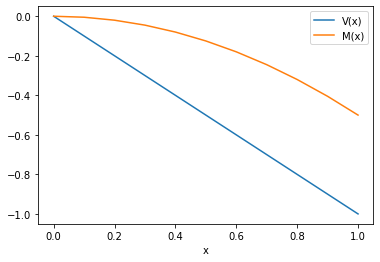

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations
def eqns(y, x, q):
    V, M = y
    dVdx = -q(x)
    dMdx = V
    return [dVdx, dMdx]

# Define the initial conditions
y0 = [0, 0]

# Define the range of x values to solve for
x = np.linspace(0, 1, 11)

# Define q as a function of x
q = lambda x: 1

# Solve the differential equations
sol = odeint(eqns, y0, x, args=(q,))

# Extract the solutions for V(x) and M(x)
V = sol[:, 0]
M = sol[:, 1]

# Print the values of V(x) and M(x) at x=0.5
x_interp = 0.4
idx = np.where(np.isclose(x, x_interp))[0][0]
V_interp = V[idx]
M_interp = M[idx]
print(f"V({x_interp}) = {V_interp}")
print(f"M({x_interp}) = {M_interp}")

# Iterate over values of V(x) and M(x) at multiple x values
for i in range(11):
    x_interp = i * 0.1
    V_interp = np.interp(x_interp, x, V)
    M_interp = np.interp(x_interp, x, M)
    print(f"V({x_interp}) = {V_interp}")
    print(f"M({x_interp}) = {M_interp}")
    print()

# Plot the solutions
plt.plot(x, V, label='V(x)')
plt.plot(x, M, label='M(x)')
plt.xlabel('x')
plt.legend()
plt.show()


[[0.5   0.5  ]
 [0.6   0.555]
 [0.7   0.62 ]
 [0.8   0.695]
 [0.9   0.78 ]
 [1.    0.875]
 [1.1   0.98 ]
 [1.2   1.095]
 [1.3   1.22 ]
 [1.4   1.355]
 [1.5   1.5  ]]


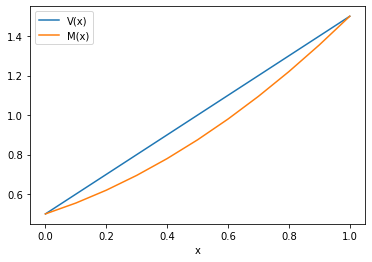

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations
def eqns(y, x, q):
    V, M = y
    dVdx = -q(x)
    dMdx = V
    return [dVdx, dMdx]

# Define the initial conditions
y0 = [0.5, 0.5]

# Define the range of x values to solve for
x = np.linspace(0, 1, 11)

# Define q as a function of x
q = lambda x: -1

# Solve the differential equations
sol = odeint(eqns, y0, x, args=(q,))
print (sol)
# Extract the solutions for V(x) and M(x)
V = sol[:, 0]
M = sol[:, 1]

# Plot the solutions
plt.plot(x, V, label='V(x)')
plt.plot(x, M, label='M(x)')
plt.xlabel('x')
plt.legend()
plt.show()

V(0.0) = 0.0
M(0.0) = 0.0

V(0.1) = 0.1
M(0.1) = 0.005000000001489973

V(0.2) = 0.2
M(0.2) = 0.020000000001489975

V(0.30000000000000004) = 0.30000000000000004
M(0.30000000000000004) = 0.04500000000148999

V(0.4) = 0.4
M(0.4) = 0.08000000000148998

V(0.5) = 0.5
M(0.5) = 0.12500000000148992

V(0.6000000000000001) = 0.6000000000000002
M(0.6000000000000001) = 0.1800000000014899

V(0.7000000000000001) = 0.7000000000000002
M(0.7000000000000001) = 0.24500000000149003

V(0.8) = 0.8
M(0.8) = 0.3200000000014902

V(0.9) = 0.9
M(0.9) = 0.40500000000149006

V(1.0) = 1.0
M(1.0) = 0.5000000000014899



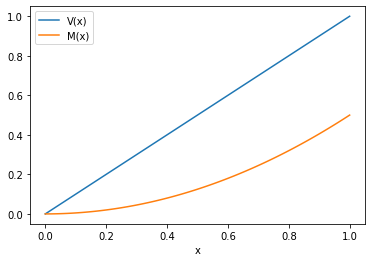

In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations
def eqns(y, x, q):
    V, M = y
    dVdx = -q(x)
    dMdx = V
    return [dVdx, dMdx]

# Define the initial conditions
y0 = [0, 0]

# Define the range of x values to solve for
x = np.linspace(0, 1, 101)

# Define q as a function of x
q = lambda x: -1

# Solve the differential equations
sol = odeint(eqns, y0, x, args=(q,))

# Extract the solutions for V(x) and M(x)
V = sol[:, 0]
M = sol[:, 1]

# Iterate over values of V(x) and M(x) at multiple x values
for i in range(11):
    x_interp = i * 0.1
    V_interp = np.interp(x_interp, x, V)
    M_interp = np.interp(x_interp, x, M)
    print(f"V({x_interp}) = {V_interp}")
    print(f"M({x_interp}) = {M_interp}")
    print()

# Plot the solutions
plt.plot(x, V, label='V(x)')
plt.plot(x, M, label='M(x)')
plt.xlabel('x')
plt.legend()
plt.show()

[0.    0.045 0.08  0.105 0.12  0.125 0.12  0.105 0.08  0.045 0.   ]

[ 0.5  0.4  0.3  0.2  0.1  0.  -0.1 -0.2 -0.3 -0.4 -0.5]


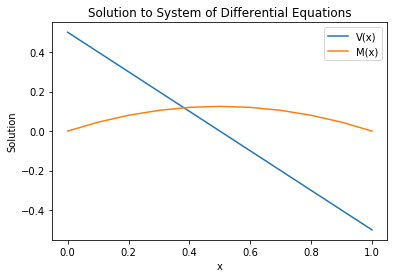

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants and initial conditions
q = 1.0
C1 = 0.5 * q
C2 = 0.0
x0 = 0.0
M0 = 0.0
x_end = 1.0

# Define the functions for V and M
def V(x):
    return -q * x + C1

def M(x):
    return -0.5 * q * x**2 + C1 * x + C2

# Create an array of x values
x_values = np.linspace(x0, x_end, 11)

# Compute the corresponding V and M values
V_values = V(x_values)
M_values = M(x_values)

print(M_values)
print()
print(V_values)

# Plot the solutions
plt.plot(x_values, V_values, label='V(x)')
plt.plot(x_values, M_values, label='M(x)')

# Add labels and legend to the plot
plt.xlabel('x')
plt.ylabel('Solution')
plt.title('Solution to System of Differential Equations')
plt.legend()

# Show the plot
plt.show()